In [4]:
import pandas as pd
df = pd.read_csv('DOG_15MIN_NO_BOXCOX.CSV')
# Преобразуем данные в формат datetime, если нужно
df['Open time'] = pd.to_datetime(df['Open time'])

# Убедитесь, что индексы в DataFrame - это временной ряд
df = df.set_index('Open time')  # если 'Open time' - это временная метка

In [6]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Модель 1
## VAR
### Векторная авторегрессия (VAR) 

In [5]:
df.head()

,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range,target
Open time,,,,,,,,
2020-11-19 19:00:00,4176342.0,12142.156017,15584224.0,398.0,107.0,45472.261790,0.012929,-0.009279
2020-11-19 19:15:00,5646231.0,16335.192524,2069729.0,31.0,83.0,5992.098954,0.007804,-0.003644
2020-11-19 19:30:00,2030787.0,5898.155289,3973756.0,44.0,23.0,11541.000277,0.005138,0.003897
2020-11-19 19:45:00,1021437.0,2975.096665,455524.0,9.0,19.0,1325.352797,0.003265,0.002027
2020-11-19 20:00:00,4592669.0,13323.285198,3051972.0,32.0,49.0,8864.029809,0.003471,-0.002715


In [10]:
df_diff = df.diff().dropna()

In [8]:
model = VAR(df.diff().dropna())  # Используем дифференцированные данные
lag_order = model.select_order().aic
print(f"Оптимальное количество лагов: {lag_order}")



c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Оптимальное количество лагов: 73


In [11]:
model_fitted = model.fit(lag_order)

# Прогнозирование
forecast_steps = 3  # количество шагов вперед
forecast = model_fitted.forecast(df_diff.values[-lag_order:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], columns=df.columns)

In [12]:
# Для абсолютной ошибки
abs_errors = np.abs(forecast_df - df.iloc[-forecast_steps:])
print("Абсолютные ошибки:")
print(abs_errors)

# Вы можете вывести ошибку для каждой переменной или для каждого шага прогноза


Абсолютные ошибки:
                     Taker Buy Base Asset Volume  \
2024-11-19 18:15:00                          NaN   
2024-11-19 18:30:00                          NaN   
2024-11-19 18:45:00                          NaN   
2024-11-20 18:45:00                          NaN   
2024-11-21 18:45:00                          NaN   
2024-11-22 18:45:00                          NaN   

                     Taker Buy Quote Asset Volume  \
2024-11-19 18:15:00                           NaN   
2024-11-19 18:30:00                           NaN   
2024-11-19 18:45:00                           NaN   
2024-11-20 18:45:00                           NaN   
2024-11-21 18:45:00                           NaN   
2024-11-22 18:45:00                           NaN   

                     Taker Sell Base Asset Volume  seller_trades  buer_trades  \
2024-11-19 18:15:00                           NaN            NaN          NaN   
2024-11-19 18:30:00                           NaN            NaN          NaN   
2

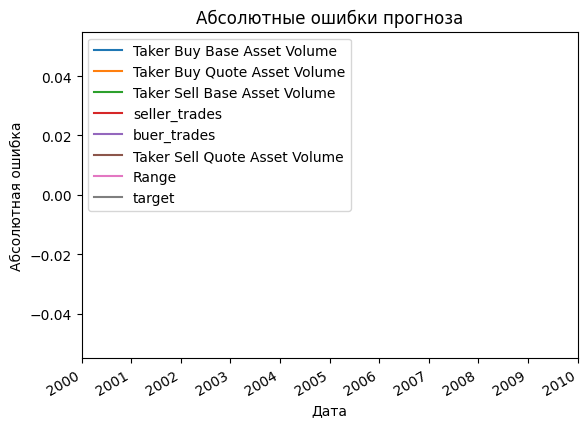

In [13]:
abs_errors.plot()
plt.title("Абсолютные ошибки прогноза")
plt.xlabel("Дата")
plt.ylabel("Абсолютная ошибка")
plt.legend(loc="upper left")
plt.show()
